In [1]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import shutil, os, time, datetime, re
import pandas as pd
from PIL import Image
from scraper import DataPreparation, Corpus
from analyzer import Analyzer

# TODO

- carousel finder
- select some features from builtwith

# WORKFLOW

1. Create Corpus with `Corpus.initCorpus()` (once initialized, you do not have to initialize it again).
2. Prepare the website data in the corpus (via `DataPreparation()` class).

    1. Download and analyze images via `DataPreparation.getImages()`.
    2. Once you have downloaded the data for the current corpus, you do not need to download and analyze the images again. You can no access them via `DataPreparation.getImagesFromPickle()`.
    3. Analyze the infrastructure of the websites with `DataPreparation.getBuiltWith()`. Once you have done this, you can access the data via `DataPreparation.getBuiltWithFromPickle()`.
    4. Create and save a dictionary with all the results (except those from `DataPreparation.getBuiltWith()`) via `DataPreparation.createAnalyzerDict()`.

3. The clustering of the data dictionary and the analysis of the `builtwith` data are conducted with the `Analyzer` class.
    1.To cluster the data in the dictionary created with `DataPreparation.createAnalyzerDict()`, the user can choose the columns that should be selected with the help of the method `Analyzer.setColumnSelection()`. The data can then be clustered with the method `Analyzer.clusterDataKMeans()`. However, it is advisable to standardize the data first with the method `Analyzer.standardizeData()`.
    2. To figure out which n works best in the `Analyzer.clusterDataKMeans()` method, the user can use `Analyzer.createElbowPlot()`.
    3. The results of the clustering can be visualized with `Analyzer.visualizeCluster()`-
    4. To analyze the `builtwith` data, the user first needs to execute `Analyzer.getBuiltWithCategorical()`.
    5. Then, the data can be anaylzed using cosine with `Analyzer.getCosine4CategoricalData()`.

# Corpus Creation

In [2]:
cp = Corpus()

In [4]:
#cp.initCorpus()

# Data Preparation

In [3]:
dp = DataPreparation()

Please accept potential access restrictions and press any key to continue...
Checking background images...
Please accept potential access restrictions and press any key to continue...
Checking background images...
Found background-image URL! '/ekd_de/ds_img/assets_slider/20161017_lutherbibel_rdax_60.jpg'
Found background-image URL! '/ekd_de/ds_img/assets_slider/20161017_lutherbibel_rdax_60.jpg'
Found background-image URL! '/ekd_de/ds_img/assets_slider/20161017_lutherbibel_rdax_60.jpg'
Found background-image URL! '/ekd_de/ds_img/assets_slider/20161017_lutherbibel_rdax_60.jpg'
Found background-image URL! '/ekd_de/ds_img/assets_slider/20161017_lutherbibel_rdax_60.jpg'
Found background-image URL! '/ekd_de/ds_img/assets_slider/20161017_lutherbibel_rdax_60.jpg'
Found background-image URL! ''
Found background-image URL! ''
Found background-image URL! ''
Found background-image URL! ''
Found background-image URL! ''
Found background-image URL! ''
Found background-image URL! ''
Found background-

Please accept potential access restrictions and press any key to continue...
Checking background images...
Found background-image URL! ""

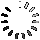

{'marginalie.hypotheses.org': {'total_images': 5,
  'big_images': 1,
  'middle_images': 3,
  'small_images': 0,
  'very_small_images': 1,
  'background_images': 0,
  'images': {'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2014/12/banner_marginalien.jpg': {'height': 288,
    'width': 1000},
   'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2015/11/IMG_7706-5-500x247.jpg': {'height': 259,
    'width': 510},
   'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2020/10/marina-khrapova-nE4CsEL9Z_s-unsplash-500x333.jpg': {'height': 344,
    'width': 510},
   'https://s.w.org/images/core/emoji/13.0.0/svg/21a9.svg': {'height': 12,
    'width': 12},
   'https://f-origin.hypotheses.org/wp-content/blogs.dir/2379/files/2020/05/nordwood-themes-yyMJNPgQ-X8-unsplash-500x333.jpg': {'height': 398,
    'width': 591}}},
 'ekd.de': {'total_images': 35,
  'big_images': 1,
  'middle_images': 14,
  'small_images': 20,
  'very_small_images': 0,
  'backgroun
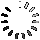

In [4]:
dp.getImages()

In [ ]:
#bw_dict = dp.getBuiltWith()

In [ ]:
#bw_dict = dp.getBuiltWithFromPickle()

In [ ]:
#bw_dict

In [5]:
data_dict = dp.createAnalyzerDict()

<DirEntry 'INFO.txt'>
<DirEntry 'marginalie.hypotheses.org.html'>
<DirEntry 'www.ekd.de.html'>
<DirEntry 'www.faz.net.html'>
<DirEntry 'www.gamestar.de.html'>
<DirEntry 'www.liebesleben.de.html'>
<DirEntry 'www.netzwerk-ebd.de.html'>
<DirEntry 'www.nike.com.html'>
<DirEntry 'www.nytimes.com.html'>
<DirEntry 'www.oma-kocht.de.html'>
<DirEntry 'www.spd.de.html'>
<DirEntry 'www.wind-energie.de.html'>
<DirEntry 'www.windows-faq.de.html'>


# Analysis

In [6]:
ana = Analyzer()

In [3]:
# Categorical Data from builtwith

In [4]:
#bw_data = ana.getBuiltWithCategorical()

In [5]:
#bw_clustered = ana.getCosine4CategoricalData(bw_data)

In [6]:
#bw_data

In [7]:
#bw_clustered

In [8]:
# KMeans clustering and standardization

In [47]:
ana.setColumnSelection(['total_length'])

Columns successfully changed!


In [48]:
ana.getColumnSelection()

Currently, the following columns are selected: ['total_length']


In [49]:
ana_small = ana.data_df[ana.column_selection]

In [50]:
standardized_data = ana.standardizeData(ana_small)

In [53]:
clustered_data = ana.clusterDataKMeans(standardized_data, n=3)

Websites in cluster 0:
-----------------------------------------------

marginalie.hypotheses.org
https://marginalie.hypotheses.org/
ekd.de
https://www.ekd.de/
gamestar.de
https://www.gamestar.de/
nike.com
https://www.nike.com/
nytimes.com
https://www.nytimes.com/

Websites in cluster 1:
-----------------------------------------------

faz.net
https://www.faz.net/aktuell/
wind-energie.de
https://www.wind-energie.de/die-windkraft/

Websites in cluster 2:
-----------------------------------------------

liebesleben.de
https://www.liebesleben.de/
netzwerk-ebd.de
https://www.netzwerk-ebd.de/
oma-kocht.de
https://www.oma-kocht.de/
spd.de
https://www.spd.de/
windows-faq.de
https://www.windows-faq.de/



Creating elbow plot in range between [2, 3, 4, 5, 6, 7, 8] n for KMeans.


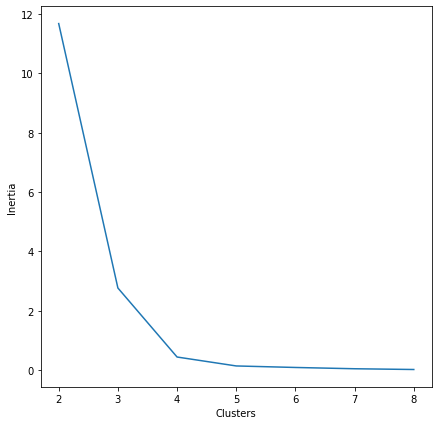

In [52]:
ana.createElbowPlot(clustered_data)

In [15]:
#ana.visualizeCluster(clustered_data, "total_length", "total_images")

In [13]:
ana.getScreenshotsFromClusters(clustered_data)

marginalie.hypotheses.org
3
Press enter to continue and take screenshot of page...
Screenshots/3/marginalie.hypotheses.org.png
ekd.de
1
Press enter to continue and take screenshot of page...
Screenshots/1/ekd.de.png
faz.net
2
Press enter to continue and take screenshot of page...
Screenshots/2/faz.net.png
gamestar.de
1
Press enter to continue and take screenshot of page...
Screenshots/1/gamestar.de.png
liebesleben.de
2
Press enter to continue and take screenshot of page...
Screenshots/2/liebesleben.de.png
netzwerk-ebd.de
1
Press enter to continue and take screenshot of page...
Screenshots/1/netzwerk-ebd.de.png
nike.com
0
Press enter to continue and take screenshot of page...
Screenshots/0/nike.com.png
nytimes.com
2
Press enter to continue and take screenshot of page...
Screenshots/2/nytimes.com.png
oma-kocht.de
2
Press enter to continue and take screenshot of page...
Screenshots/2/oma-kocht.de.png
spd.de
1
Press enter to continue and take screenshot of page...
Screenshots/1/spd.de.png


In [54]:
clustered_data

,total_length_scaled,clusters
marginalie.hypotheses.org,-0.032334,0
ekd.de,0.429641,0
faz.net,2.400957,1
gamestar.de,-0.221546,0
liebesleben.de,-0.886133,2
netzwerk-ebd.de,-0.702348,2
nike.com,-0.322249,0
nytimes.com,0.187833,0
oma-kocht.de,-0.809751,2
spd.de,-0.975781,2


In [27]:
ana.data_df

,total_images,big_images,middle_images,small_images,very_small_images,background_images,total_length,external_links,internal_links,total_links,RA_big_images/total_images,RA_middle_images/total_images,RA_small_images/total_images,RA_very_small_images/total_images,RA_total_images/total_length,RA_big_and_middle_images/total_length,RA_internal_links/external_links
marginalie.hypotheses.org,5,1,3,0,1,0,17994,27,232,259,0.200000,0.600000,0.000000,0.200000,0.000278,0.000222,8.592593
ekd.de,35,1,14,20,0,1,24889,15,485,500,0.028571,0.400000,0.571429,0.000000,0.001406,0.000603,32.333333
faz.net,38,3,2,33,0,2,54311,18,757,775,0.078947,0.052632,0.868421,0.000000,0.000700,0.000092,42.055556
gamestar.de,46,2,3,41,0,0,15170,27,390,417,0.043478,0.065217,0.891304,0.000000,0.003032,0.000330,14.444444
liebesleben.de,7,0,2,5,0,4,5251,11,132,143,0.000000,0.285714,0.714286,0.000000,0.001333,0.000381,12.000000
netzwerk-ebd.de,12,0,2,9,1,0,7994,21,183,204,0.000000,0.166667,0.750000,0.083333,0.001501,0.000250,8.714286
nike.com,16,7,9,0,0,2,13667,6,564,570,0.437500,0.562500,0.000000,0.000000,0.001171,0.001171,94.000000
nytimes.com,78,1,7,70,0,1,21280,5,580,585,0.012821,0.089744,0.897436,0.000000,0.003665,0.000376,116.000000
oma-kocht.de,49,1,10,38,0,4,6391,13,292,305,0.020408,0.204082,0.775510,0.000000,0.007667,0.001721,22.461538
spd.de,3,1,0,2,0,1,3913,4,111,115,0.333333,0.000000,0.666667,0.000000,0.000767,0.000256,27.750000


# Testing stuff

In [ ]:
#try and get live image sizes

In [34]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
import time

In [42]:
wbdriver = webdriver.Edge("webdriver/msedgedriver.exe")

In [43]:
page = wbdriver.get("https://www.faz.net")

In [44]:
wbdriver.maximize_window()

In [49]:

for x in range(10):
    wbdriver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(2)

In [50]:
imgs = wbdriver.find_elements_by_tag_name("img")

In [51]:
true_counter = 0
for img in imgs:
    if img.is_displayed():
        true_counter += 1
        print(img.get_attribute("src"))

https://media1.faz.net/ppmedia/aktuell/1103502508/1.6684701/avatar80x80/die-zahl-derer-die-sich.jpg
https://media0.faz.net/ppmedia/aktuell/2571813293/1.7136426/format_top1_breit/ein-lehrer-in-einem-leeren.jpg
https://media1.faz.net/ppmedia/aktuell/254045363/1.7136635/article_teaser_top2/mit-speer-und-ohne-t-shirt-im.jpg
https://media0.faz.net/ppmedia/aktuell/politik/von-trump-zu-biden/1080348380/1.7136158/article_teaser_top2/donald-trump-am-donnerstag-im.jpg
https://media0.faz.net/ppmedia/redaktion/3946603523/1.1123696/avatar50x50/jasper-von-altenbockum-kum.jpg
https://media1.faz.net/ppmedia/aktuell/politik/fraktur/2608167345/1.7136399/article_teaser_top2/kann-ebenfalls-systemrelevant.jpg
https://media0.faz.net/ppmedia/aktuell/politik/ausland/2515062192/1.7134532/article_teaser_top2/ende-oktober-im-nizza-trauer.jpg
https://media0.faz.net/ppmedia/aktuell/wissen/1127451885/1.7132468/article_teaser_top2/aggressive-fremdgeher.jpg
https://www.faz.net/img/leer.gif
https://www.faz.net/img/lee

In [52]:
true_counter

130

In [68]:
for bb in bck:
    print(bb.value_of_css_property("background-image"))

url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/USA.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/IND.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/BRA.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/GBR.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/MEX.svg")
url("https://static01.nyt.com/newsgraphics/2020/03/16/coronavirus-maps/5990fca4458a05ec9a94c765b40d83fe0b2485fe/build/curve-grid/cases/total/CAN.svg")


In [72]:
elem = wbdriver.find_element_by_text("Subscribe now")

AttributeError: 'WebDriver' object has no attribute 'find_element_by_text'

In [77]:
true_counter

78

In [78]:
len(imgs)

118